In [1]:
import numpy as np
import matplotlib.pyplot as plt
import search
import GraphNode as gn

%load_ext autoreload
%autoreload 2

In [2]:
M = 20
N = 20
thresh = 0.7
aMap = np.random.random((M,N))
ind1 = aMap >= thresh
aMap[ind1] = np.ones(np.sum(ind1))
ind0 = aMap < thresh
aMap[ind0] = np.zeros(np.sum(ind0))

start = (0,0)
reachable_dfs = search.dfs(aMap,start)
reachable_bfs = search.bfs(aMap,start)

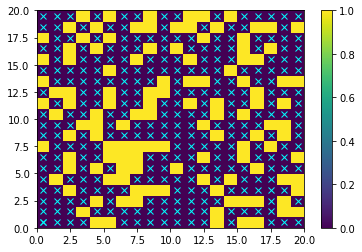

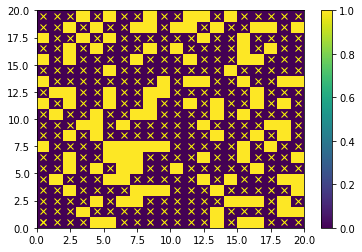

In [3]:
# DFS
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_dfs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='cyan',marker='x',linestyle='None')

# BFS
fig,ax = plt.subplots()
im = plt.pcolormesh(aMap)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)

x = []
y = []
for node in reachable_bfs:
    y.append(node[0]+0.5)
    x.append(node[1]+0.5)
plt.plot(x,y,color='yellow',marker='x',linestyle='None')

plt.show()

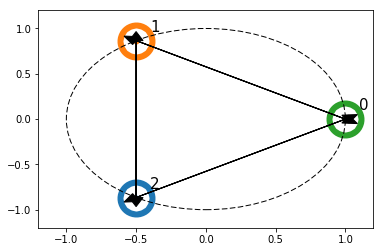

In [4]:
dataIn = '[{"val":0,"idx":0,"idxNgbs":[1,2]},{"val":1,"idx":1,"idxNgbs":[0,2]},{"val":2,"idx":2,"idxNgbs":[0,1]}]'
nodes = gn.deserialize(dataIn,plot=True)

In [5]:
dataOut = gn.serialize(nodes)
print('dataOut = '+str(dataOut))

dataOut = [{"idxNgbs": [1, 2], "idx": 0, "val": 2}, {"idxNgbs": [0, 2], "idx": 1, "val": 1}, {"idxNgbs": [0, 1], "idx": 2, "val": 0}]


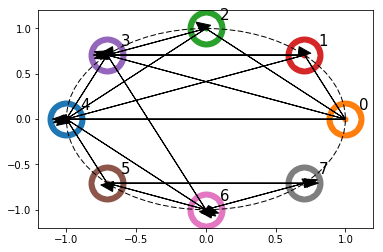

In [6]:
dataIn = '[{"val":0,"idx":0,"idxNgbs":[1,2,3,4]},{"val":1,"idx":1,"idxNgbs":[3,4]},{"val":2,"idx":2,"idxNgbs":[3,4]},{"val":3,"idx":3,"idxNgbs":[6]},{"val":4,"idx":4,"idxNgbs":[3,5,6]},{"val":5,"idx":5,"idxNgbs":[6,7]},{"val":6,"idx":6,"idxNgbs":[7]},{"val":7,"idx":7,"idxNgbs":[]}]'
nodes = gn.deserialize(dataIn,plot=True)

In [14]:
while True:
    start = nodes.pop()
    nodes.add(start)
    if start.val == 0:
        break
        
reachable_dfs2Pre = search.dfs2Pre(nodes,start)
reachable_dfs2Post = search.dfs2Post(nodes,start)
reachable_bfs2 = search.bfs2(nodes,start)

print('start.val = '+str(start.val))
print('reachable_dfs2Pre = '+str(reachable_dfs2Pre))
print('reachable_dfs2Post = '+str(reachable_dfs2Post))
print('reachable_bfs2 = '+str(reachable_bfs2))

start.val = 0
reachable_dfs2Pre = [0, 4, 6, 7, 5, 2, 1, 3]
reachable_dfs2Post = [7, 6, 5, 3, 4, 2, 1, 0]
reachable_bfs2 = [0, 3, 1, 2, 4, 6, 5, 7]
